In [17]:
%load_ext autoreload
%autoreload 2


from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import embedder_generator as emb_gen
import networkx as nx
import numpy as np
import utilities 

from embedder import Embedder
from embedder import Kernel_GNN
from embedder import Transformer
from umap import UMAP

In [19]:
bits = [2,3,4,5,6,7,8,9,10,11,12,13]

In [20]:
res = test_nbits(bits)

Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  4
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  66
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  8
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  131
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  16
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  71
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  32
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  83
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  64
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  73


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  128
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  63
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  256
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  60


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  512
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  57
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  1024
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  57
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  2048
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  55
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  4096
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  52
Negative samples:  136
Positive samples:  256
max numb of nodes:  42
n_attributes:  8192
	 iteration n: 1
	 	 dim:  2
	 	 	  BASELINE: SpK + UMAP
Stopped epoch:  53


/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/antonio/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


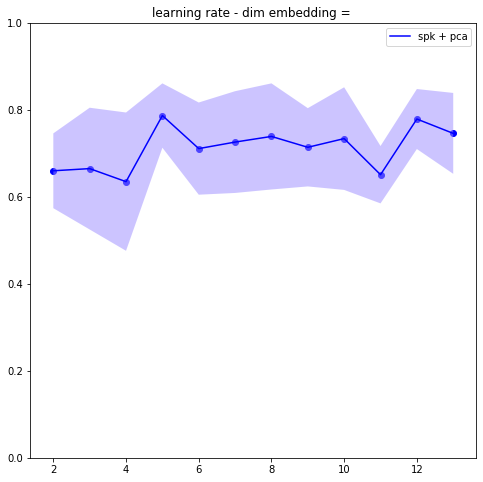

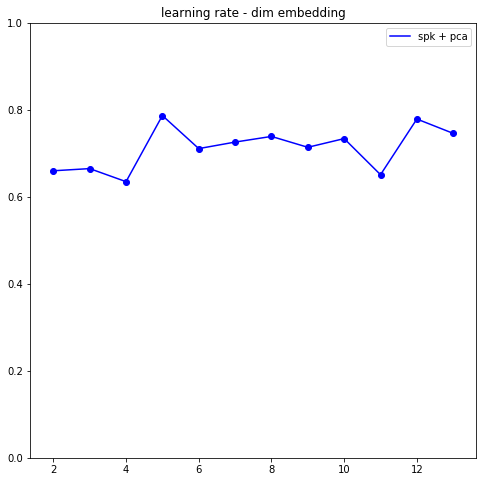

In [21]:
tmp_plot_std(res)
tmp_plot(res)

In [22]:
c = 0
for r in list(res.values()):
    print("\nbit_used: ",bits[c])
    c = c + 1
    r.summary()


bit_used:  2
                         2    STD    mean
--------------------  ----  -----  ------
BASELINE: SpK + UMAP  0.66  0.086   0.373

bit_used:  3
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.665   0.14   0.402

bit_used:  4
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.635  0.159   0.397

bit_used:  5
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.787  0.074    0.43

bit_used:  6
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.711  0.106   0.408

bit_used:  7
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.726  0.117   0.422

bit_used:  8
                          2    STD    mean
--------------------  -----  -----  ------
BASELINE: SpK + UMAP  0.739  0.122    0.43

b

In [4]:
def test_nbits(n_bits):
    
    res = {}
    for i in n_bits:
        vis = execute(i)
        res[i] = vis
        
    return(res)

In [5]:
import matplotlib.pyplot as plt
def tmp_plot(res):
    a = list(res.keys())
    visualizators = list(res.values())
    
    pos = 1

    spk_baseline = []

    for v in visualizators:
        result_matrix = v.summary(std=False,return_matrix=True)
        spk_baseline.append(result_matrix[0][pos])
        
        
    plt.figure(figsize=(8,8))
    plt.title(str("learning rate - dim embedding"))
    plt.plot(a,spk_baseline, label='spk + pca',color='b')
    plt.scatter(a,spk_baseline,color='b')
    plt.ylim([0,1])
    plt.legend()
    
def tmp_plot_std(res):
    
    a = list(res.keys())
    visualizators = list(res.values())
    
    pos = 1
    spk_baseline = []
    spk_baseline_std = []

    for v in visualizators:
        result_matrix = v.summary(return_matrix=True)

        spk_baseline.append(result_matrix[0][pos])
        spk_baseline_std.append(result_matrix[0][pos+1])
        

    plt.figure(figsize=(8,8))
    plt.title(str("learning rate - dim embedding = "))
    plt.plot(a,spk_baseline, label='spk + pca',color='b')
    plt.scatter(a,spk_baseline,color='b')
    low = [spk_baseline[i]-spk_baseline_std[i] for i in range(0,len(spk_baseline))] 
    upp = [spk_baseline[i]+spk_baseline_std[i] for i in range(0,len(spk_baseline))]
    plt.fill_between(a,low,upp, facecolor='#9B8BFF', alpha=0.5)
    plt.ylim([0,1])
    plt.legend()

In [6]:
def execute(vec_vet_nbits):
    
    graphs, labels = load_generated_data_classification("generate_graphs/624249_pos_neg")
    for g in graphs:
        for node in g.nodes():
            g.nodes[node]['vec'] = []
    for g in graphs:
        for edge in g.edges():
            g.edges[edge]['vec'] = []
            
    graphs = utilities.add_info_to_nodes(graphs,[utilities.vec_vertex],param=vec_vet_nbits)
    max_n_nodes,n_attributes = utilities.find_shapes(graphs)
    
    print("n_attributes: ",n_attributes)
    
    emb = generate_embedder(max_n_nodes,n_attributes)
    
    vis = utilities.repeat_n_times(graphs, labels, [emb] , [2], 1,test_size=0.3,seed = 11)
    
    return(vis)

def generate_embedder(max_n_nodes,n_attributes):

    # SpeKtral GNN
    spk_gnn, spk_emb = emb_gen.gen_SpektralGNN_emb(n_classes= 2,
                                                    n_components= 128,
                                                    max_n_nodes= max_n_nodes,
                                                    n_attributes= n_attributes)



    kernel_spk = Kernel_GNN(classificator = spk_gnn,
                           embedder = spk_emb,
                           batch_size = 32,
                           validation_split = 0.2,
                           epochs = 300,
                           patience = 50)
                           #callbacks = [tb],
    k1 = Transformer(kernel_spk)

    # umap
    m1 = Transformer(UMAP(n_components = 2))

    # embedder
    emb = Embedder([k1,m1],"BASELINE: SpK + UMAP")
    
    return (emb)

def load_generated_data_classification(path):
    
    graphs = nx.read_gpickle(path+'/'+'graphs.gpickle')    
    labels = list(np.load(path+'/'+'labels.npy'))
   
    return (graphs,labels)